In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/data_subjects_info.csv


In [2]:
test_df = pd.read_csv('/kaggle/input/dataset/data_subjects_info.csv')
test_df.head()

,code,weight,height,age,gender
0,1,102,188,46,1
1,2,72,180,28,1
2,3,48,161,28,0
3,4,90,176,31,1
4,5,48,164,23,0


In [3]:
test_df.shape

(24, 5)

In [4]:
test_df.dtypes

code      int64
weight    int64
height    int64
age       int64
gender    int64
dtype: object

In [5]:
test_df.info

<bound method DataFrame.info of     code  weight  height  age  gender
0      1     102     188   46       1
1      2      72     180   28       1
2      3      48     161   28       0
3      4      90     176   31       1
4      5      48     164   23       0
5      6      76     180   28       1
6      7      62     175   30       0
7      8      52     161   24       0
8      9      93     190   32       1
9     10      72     164   31       0
10    11      70     178   24       1
11    12      60     167   33       1
12    13      60     178   33       1
13    14      70     180   35       1
14    15      70     185   33       1
15    16      96     172   29       0
16    17      76     180   26       1
17    18      54     164   26       0
18    19      78     164   28       0
19    20      88     180   25       1
20    21      52     165   24       1
21    22     100     186   31       1
22    23      68     170   25       0
23    24      74     173   18       0>

In [6]:
test_df.isna().values.any()

False

In [7]:
test_df[test_df.duplicated()]

,code,weight,height,age,gender


In [8]:
test_df.duplicated().value_counts()

False    24
dtype: int64

In [9]:
test_df.describe()

,code,weight,height,age,gender
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,12.500000,72.125000,174.208333,28.791667,0.583333
std,7.071068,16.211409,8.900313,5.437224,0.503610
min,1.000000,48.000000,161.000000,18.000000,0.000000
25%,6.750000,60.000000,164.750000,25.000000,0.000000
50%,12.500000,71.000000,175.500000,28.000000,1.000000
75%,18.250000,80.500000,180.000000,31.250000,1.000000
max,24.000000,102.000000,190.000000,46.000000,1.000000


In [10]:
test_df.corr

<bound method DataFrame.corr of     code  weight  height  age  gender
0      1     102     188   46       1
1      2      72     180   28       1
2      3      48     161   28       0
3      4      90     176   31       1
4      5      48     164   23       0
5      6      76     180   28       1
6      7      62     175   30       0
7      8      52     161   24       0
8      9      93     190   32       1
9     10      72     164   31       0
10    11      70     178   24       1
11    12      60     167   33       1
12    13      60     178   33       1
13    14      70     180   35       1
14    15      70     185   33       1
15    16      96     172   29       0
16    17      76     180   26       1
17    18      54     164   26       0
18    19      78     164   28       0
19    20      88     180   25       1
20    21      52     165   24       1
21    22     100     186   31       1
22    23      68     170   25       0
23    24      74     173   18       0>

In [11]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

<AxesSubplot:>

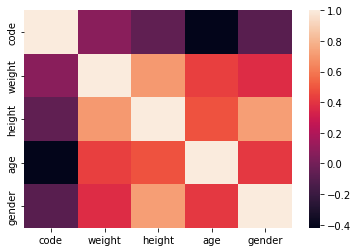

In [12]:
sns.heatmap(data=test_df.corr())

In [13]:
test_df['code'].value_counts()

1     1
2     1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
24    1
Name: code, dtype: int64

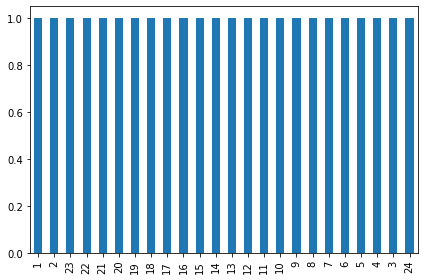

In [14]:
test_df['code'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

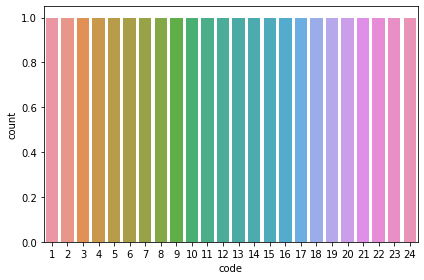

In [15]:
sns.countplot(data=test_df, x='code')
plt.tight_layout()

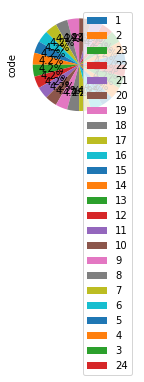

In [16]:
test_df['code'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

Text(0.5, 1.0, 'gender')

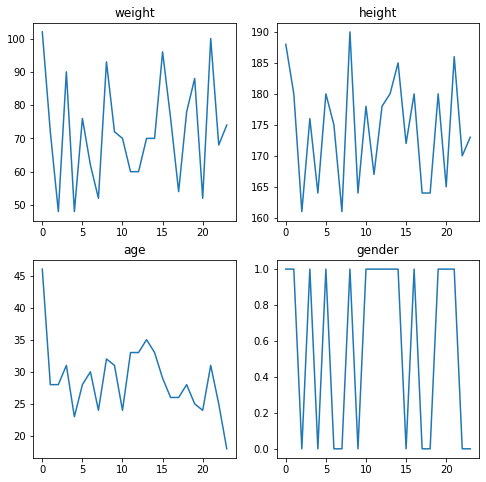

In [17]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

test_df['weight'].plot.line(ax=ax[0][0])
ax[0][0].set_title('weight')

test_df['height'].plot.line(ax=ax[0][1])
ax[0][1].set_title('height')

test_df.age.plot.line(ax=ax[1][0])
ax[1][0].set_title('age')

test_df.gender.plot.line(ax=ax[1][1])
ax[1][1].set_title('gender')

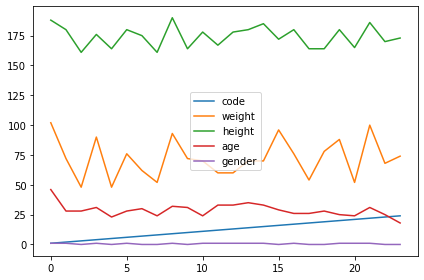

In [18]:
test_df.plot()
plt.tight_layout()

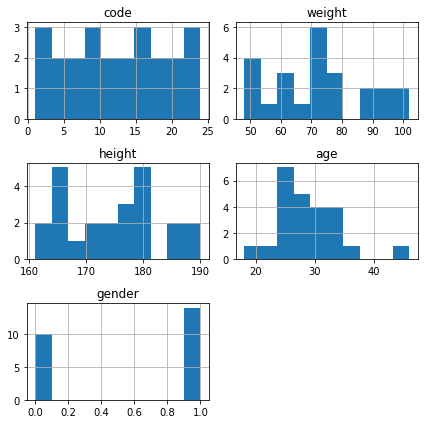

In [19]:
test_df.hist(figsize=(6,6), bins=10)
plt.tight_layout()

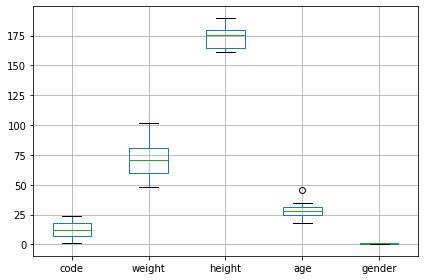

In [20]:
test_df.boxplot()
plt.tight_layout()

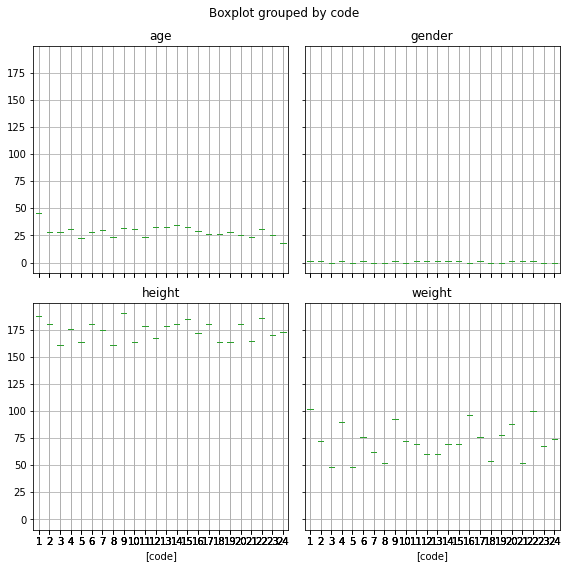

In [21]:
test_df.boxplot(by="code", figsize=(8,8))
plt.tight_layout()

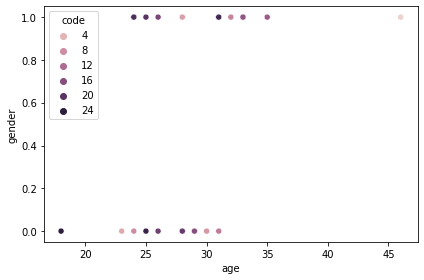

In [22]:
sns.scatterplot(x='age', y='gender', data=test_df, hue='code')
plt.tight_layout()

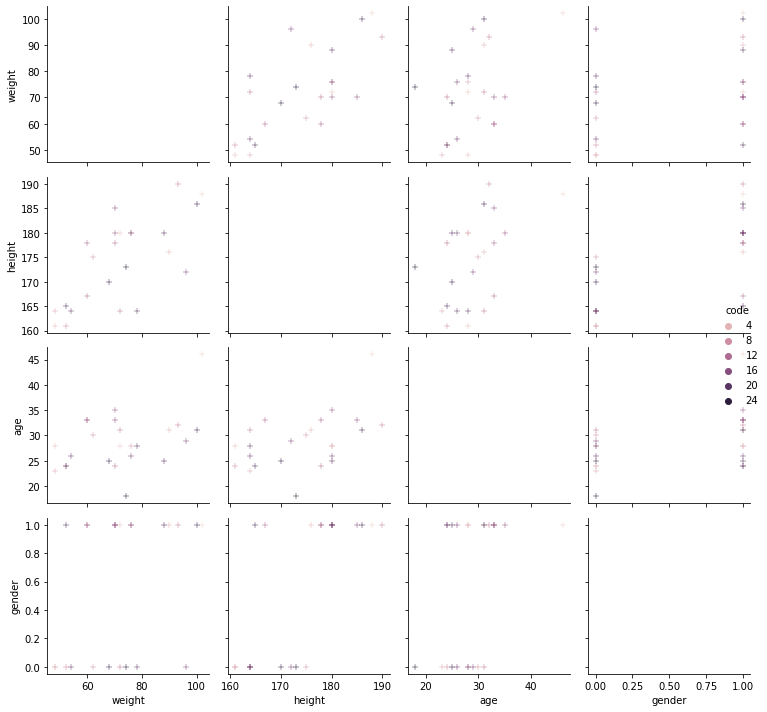

In [23]:
sns.pairplot(test_df, hue='code', markers='+')
plt.tight_layout()

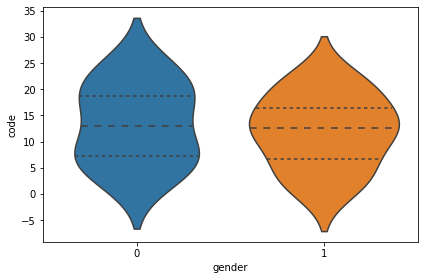

In [24]:
sns.violinplot(data=test_df, y='code', x='gender', inner='quartile')
plt.tight_layout()

In [25]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [26]:
X = test_df.drop(columns='gender') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,code,weight,height,age
0,1,102,188,46
1,2,72,180,28
2,3,48,161,28
3,4,90,176,31
4,5,48,164,23


In [27]:
y = test_df['gender'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

0    1
1    1
2    0
3    1
4    0
Name: gender, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(14, 4)
(14,)

testing dataset:
(10, 4)
(10,)


**KKN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
k_range = list(range(1,15))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

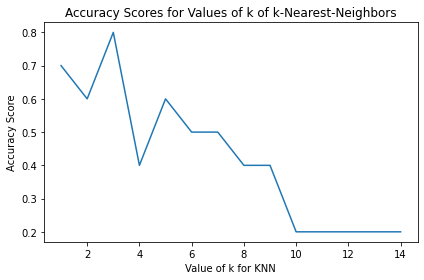

In [31]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [32]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [33]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.8


**Confusion Matrix**

In [34]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[2 0]
 [2 6]]


Clasification Report

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         8

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10



**Support Vector Classifier**

In [36]:
from sklearn.svm import SVC

In [37]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [38]:
# Decicion Tree

from sklearn.tree import DecisionTreeClassifier

In [39]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [40]:
#RFC

from sklearn.ensemble import RandomForestClassifier

In [41]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [42]:
models = [model_knn, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8, 0.2, 0.8, 0.8]


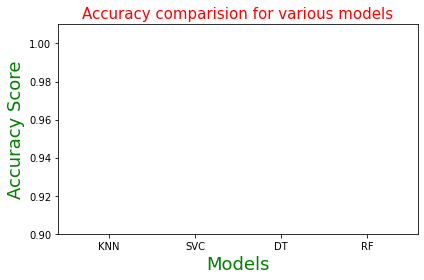

In [43]:
plt.bar(['KNN', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.90,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()